In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#importing libraries
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import  BatchNormalization
import warnings
warnings.filterwarnings("ignore")

In [8]:
import os
import shutil
main_folder = r'C:\Users\Ishwari Kadam\Desktop\SEM 3\DL\pc_parts'
train_folder = r'C:\Users\Ishwari Kadam\Desktop\SEM 3\DL\Pcparts\train'
test_folder = r'C:\Users\Ishwari Kadam\Desktop\SEM 3\DL\Pcparts\test'

In [9]:
from sklearn.model_selection import train_test_split

for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)

    if os.path.isdir(subfolder_path) and subfolder not in ['train', 'test']:
        images = os.listdir(subfolder_path)
        train_images, test_images = train_test_split(images, train_size=0.8, random_state=42)

        os.makedirs(os.path.join(train_folder, subfolder), exist_ok=True)
        os.makedirs(os.path.join(test_folder, subfolder), exist_ok=True)

        for image in train_images:
            src_path = os.path.join(subfolder_path, image)
            dst_path = os.path.join(train_folder, subfolder, image)
            shutil.copy(src_path, dst_path)

        for image in test_images:
            src_path = os.path.join(subfolder_path, image)
            dst_path = os.path.join(test_folder, subfolder, image)
            shutil.copy(src_path, dst_path)

print("Data has been split into training and test folders.")

Data has been split into training and test folders.


CNN Model

In [10]:
from inspect import modulesbyfile
model = Sequential()

#Convolution Layer
model.add(Convolution2D(64, 3, 3, input_shape = (64, 64, 3), activation = 'relu')) # entire image
model.add(BatchNormalization())

#Pooling Layer
model.add(MaxPooling2D(pool_size = (2, 2)))

#second cnn
model.add(Convolution2D(64, 3, 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

#flatten layer
model.add(Flatten())


In [11]:
#hidden layer
model.add(Dense(units = 128, activation = 'relu'))

In [12]:
#output layer
model.add(Dense(units = 14, activation = 'softmax'))  #more than two classes

In [13]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 21, 21, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 3, 3, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │           1,806 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,358 (192.80 KB)

 Trainable params: 49,102 (191.80 KB)

 Non-trainable params: 256 (1.00 KB)

In [15]:
#Fitting the CNN to the images
import tensorflow as tf

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)  # max normilization


test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r"C:\Users\Ishwari Kadam\Desktop\SEM 3\DL\Pcparts\train",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r"C:\Users\Ishwari Kadam\Desktop\SEM 3\DL\Pcparts\test",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 2616 images belonging to 14 classes.
Found 663 images belonging to 14 classes.


In [16]:
training_set.class_indices

{'cables': 0,
 'case': 1,
 'cpu': 2,
 'gpu': 3,
 'hdd': 4,
 'headset': 5,
 'keyboard': 6,
 'microphone': 7,
 'monitor': 8,
 'motherboard': 9,
 'mouse': 10,
 'ram': 11,
 'speakers': 12,
 'webcam': 13}

In [17]:
result = model.fit(training_set,
                         epochs=10,
                         validation_data = test_set)

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 31s 348ms/step - accuracy: 0.1146 - loss: 2.7677 - val_accuracy: 0.0980 - val_loss: 2.6258
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.2463 - loss: 2.3194 - val_accuracy: 0.1433 - val_loss: 2.5791
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.3455 - loss: 2.0758 - val_accuracy: 0.1689 - val_loss: 2.5359
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4195 - loss: 1.8176 - val_accuracy: 0.1614 - val_loss: 2.5257
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.5083 - loss: 1.5901 - val_accuracy: 0.1780 - val_loss: 2.4678
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.5709 - loss: 1.3840 - val_accuracy: 0.2112 - val_loss: 2.4424
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6450 - loss: 1.1756 - val_accuracy: 0.2353 - val_loss: 2.6169
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6943 - loss: 0.9856 - val_accuracy: 0.2383 -

In [18]:
model.save('pcpartsclassifier.h5')

In [20]:
pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB 7.7 MB/s eta 0:00:06
    --------------------------------------- 0.8/38.8 MB 10.4 MB/s eta 0:00:04
   - -------------------------------------- 1.5/38.8 MB 11.6 MB/s eta 0:00:04
   -- ------------------------------------- 2.1/38.8 MB 11.9 MB/s eta 0:00:04
   -- ------------------------------------- 2.5/38.8 MB 11.4 MB/s eta 0:00:04
   --- ------------------------------------ 3.1/38.8 MB 11.8 MB/s eta 0:00:04
   --- ------------------------------------ 3.7/38.8 MB 11.9 MB/s eta 0:00:03
   ---- ----------------------------------- 4.3/38.8 MB 12.0 MB/s eta 0:00:03
   ----- ---------------------------------- 4.9/38.8 MB 12.1 MB/s eta 0:00:03
   ----- ---------------------------------- 5.5/38.8 MB 12.2 MB/s eta 0:00:03
   ------ --------------------------------- 6.2/38.8 MB 12.3 MB/s eta 0:00:03
   ------ --------------------------------- 6.7/38.8 MB 12.3 MB/s eta 0:0


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
!pip install keras_preprocessing

   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   ---------------------------------------- 42.6/42.6 kB 1.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from keras.models import load_model
from keras_preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
reload_model = load_model("pcpartsclassifier.h5")

In [24]:
class_labels = {
    0: 'Cables', 1: 'Case', 2: 'CPU', 3: 'GPU', 4: 'HDD',
    5: 'Headset', 6: 'Keyboard', 7: 'Microphone', 8: 'Monitor', 9: 'Motherboard',
    10: 'Mouse', 11: 'RAM', 12: 'Speakers', 13: 'Webcam'
}


In [25]:
def model_output(path):
    # Load and preprocess the image
    raw_img = image.load_img(path, target_size=(64, 64))
    raw_img = image.img_to_array(raw_img)
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img / 255.0

    # Predict and find the class with the highest probability
    predictions = reload_model.predict(raw_img)
    class_index = np.argmax(predictions)
    class_name = class_labels[class_index]
    probability = predictions[0][class_index]
    plt.imshow(cv2.imread(path))
    plt.axis('off')
    plt.show()

    # Print the prediction and probability
    print(f"Predicted Class: {class_name}")
    print(f"Probability: {probability:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


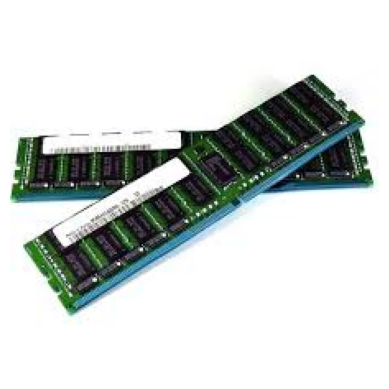

Predicted Class: RAM
Probability: 0.75


In [27]:
model_output("RAM.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


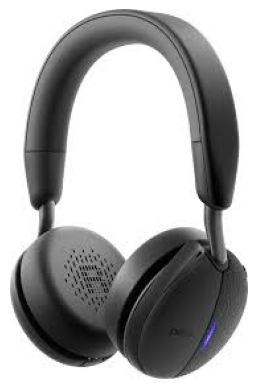

Predicted Class: Headset
Probability: 0.47


In [30]:
model_output("Headset.jpeg")